In [2]:
%run ../utils.ipynb
# %matplotlib widget

In [3]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# a = -1.000000000001
# x = np.linspace(a + 0j, 1 + 0j, 100).astype(np.complex128)
# y = np.linspace(a + 0j, 1 + 0j, 100).astype(np.complex128)
# x, y = np.meshgrid(x, y)
# z = x ** y

# ax.plot_surface(x, y, z)
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# ax.view_init(elev=50., azim=50, roll=0)
# ax.set_aspect('equal')

# plt.plot(x, y, c=np.real(z))

In [4]:
dlin = 0.1
l = 100.01; dl = 0.01 # [cm] длина стержня
x_cm = 50; dx_cm = 0.05 # [cm] координаты центра масс
a = 24.4; da = 0.05 # [cm] расстояние от цм до острия призмы
xp_cm = 52.1; dxp_cm = 0.05 # [cm] координаты центра масс вместе с призмой

m_pr = 78.4 # [g] масса призмы
m_wt = 291.0 # [g] масса доп. груза
m_rod = 891.7 # [g] масса стержня
dm = 0.1 # [g] погрешность весов???????

lpriv = a + l*l/12/a # [cm] приведённая длина

dT = 0.01 # [s] погрешность секундомера

J0 = m_rod * (l * l / 12 + a * a) # [g * cm^2]
nQ = 580 # количество колебаний до уменьшения амплитуды в 2 раза
Q = np.pi * nQ / np.log(2) # добротность

In [5]:
t1 = np.array([30.77, 30.77, 30.77, 30.78])

In [6]:
t1_mean, t1_sigma = t1.mean(), t1.std() * len(t1) / (len(t1)-1)
t1_mean

30.7725

In [7]:
dt1 = (t1_sigma**2 + 0.01**2)**0.5

In [8]:
T1, dT1 = t1_mean / 20, dt1 / 20
T1

1.5386250000000001

In [9]:
g = (l*l/12 + a*a) / ((T1 / 2 / np.pi)**2 * a) / 100
g

9.76548960652295

In [10]:
df = pd.read_excel("data.ods", engine="odf").to_numpy()
df

array([[10.  , 28.6 , 14.9 , 14.9 , 14.9 ],
       [10.  , 29.3 , 15.04, 15.04, 15.04],
       [10.  , 29.8 , 15.13, 15.13, 15.14],
       [10.  , 22.7 , 14.23, 14.23, 14.23],
       [10.  , 11.3 , 20.08, 20.08, 20.08],
       [10.  , 15.8 , 16.09, 16.09, 16.09],
       [10.  , 18.5 , 14.82, 14.82, 14.82],
       [10.  , 33.6 , 16.15, 16.15, 16.15]])

In [11]:
d = df[:, 1]
dd = d * 0 + 0.05
Tm = (df[:, 2] + df[:, 3] + df[:, 4]) / 3 / df[:, 0]
dTm = np.array([(0.01**2+np.std(i[2:])**2)**0.5/i[0] for i in df])

d, dd, Tm, dTm

(array([28.6, 29.3, 29.8, 22.7, 11.3, 15.8, 18.5, 33.6]),
 array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]),
 array([1.49      , 1.504     , 1.51333333, 1.423     , 2.008     ,
        1.609     , 1.482     , 1.615     ]),
 array([0.001     , 0.001     , 0.00110554, 0.001     , 0.001     ,
        0.001     , 0.001     , 0.001     ]))

In [12]:
m0 = m_rod + m_pr
M = m0 + m_wt
y = (M * d - m0 * a) / m_wt
dy = ((M * d  / m_wt)**2 + (0.05 * m0  / m_wt)**2)**0.5 / 10
g = 4 * np.pi**2 * (J0 + m_wt * y**2)/(Tm**2 * (m0 + m_wt) * d) / 100
gmean = g.mean()
gstd = g.std()
(g.mean(), g.std(), y, dy)


(9.443276943631702,
 0.6981755181807663,
 array([ 42.6014433 ,  45.63501718,  47.80185567,  17.03274914,
        -32.37116838, -12.86962199,  -1.16869416,  64.26982818]),
 array([12.39432736, 12.69768448, 12.91436815,  9.83746086,  4.89708335,
         6.84722991,  8.01731973, 14.56116418]))

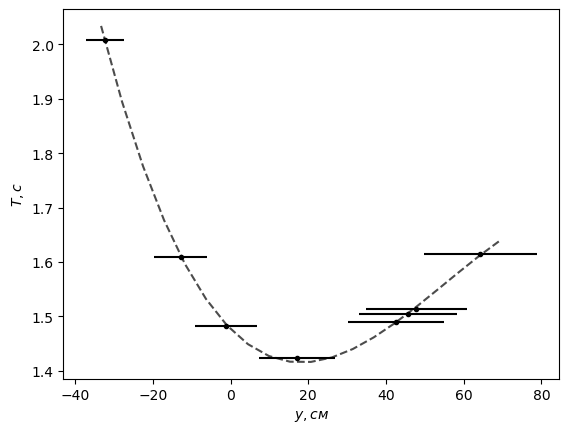

In [13]:
xx = np.linspace(min(y)-1, max(y)+5, 20)
plt.plot(xx, np.polyval(np.polyfit(y, Tm, deg=3), xx), 'k--', alpha=0.7)
plt.errorbar(y, Tm, dTm, dy, 'k.')
plt.xlabel("$y, см$")
plt.ylabel("$T, с$")
plt.savefig("p14.svg")

In [14]:
ymin = y[np.argmin(Tm)]
ymin

17.03274914089347

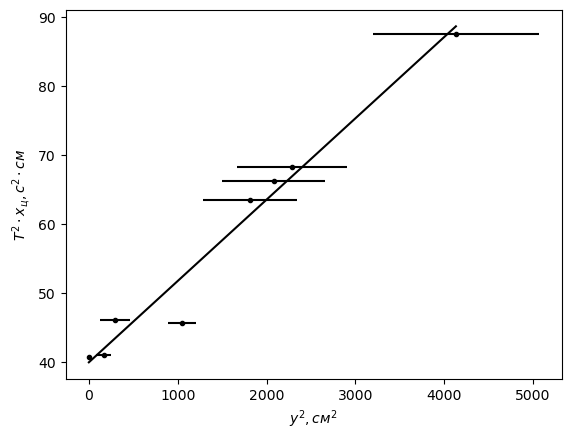

In [40]:
xx = y**2
yy = Tm ** 2 * d

# (k, b), cov, *_ = np.polyfit(xx, yy, deg=1, full=True)

k = (np.mean(xx*yy) - np.mean(xx)*np.mean(yy))/(np.mean(xx**2)-np.mean(xx)**2)
b = np.mean(yy) - k*np.mean(xx)

plt.errorbar(y**2, Tm ** 2 * d, 0, abs(y*dy), 'k.')
_x = np.array([0, max(xx)])
plt.plot(_x, _x * k + b, 'k')
plt.xlabel("$y^2, см^2$")
plt.ylabel("$T^2 \cdot x_ц , с^2 \cdot см $")
plt.savefig('p15.svg')

In [16]:
db = ((sum(yy*yy)/sum(xx*xx)-k*k)/(len(xx)-1))**0.5 * (np.mean(xx**2))**0.5
db

20.671775944415923

In [41]:
dk = ((((yy*yy).mean()-yy.mean()**2)/((xx*xx).mean()-xx.mean()**2)-k*k)/(len(xx)-2))**0.5
db = dk * (np.mean(xx**2))**0.5
db

1.7459847630710923

In [25]:
g1 = b / J0 / 4 / np.pi**2 * M * 100**2#[cm^2] # m / s^2
dg1 = db  / J0 / 4 / np.pi**2 * M * 100**2
g1, dg1

(9.99997570271999, 0.4377456010972236)

In [19]:
k / m_wt * M / 4 / np.pi**2

0.0012970068707470297

In [20]:
a + xp_cm

76.5

In [21]:
# df = np.append(df, Tm.reshape((-1, 1)), axis=1)

In [22]:
g = 4 * np.pi**2 * (J0 + m_wt * y**2)/(Tm**2 * (m0 + m_wt) * d) / 100
g

array([ 8.88557568,  8.88048378,  8.89436144,  9.25222703, 10.84927113,
       10.11987078,  9.81942326,  8.84500244])

In [23]:
g.mean(), g.std()

(9.443276943631702, 0.6981755181807663)

In [24]:
save()